**Imports**

In [43]:
import pandas as pd
import numpy as np
import requests
from json import dumps
from requests import get
from http import HTTPStatus
import matplotlib.pyplot as plt

# Activity 1

**1.1 Sub-activity: Open Data COVID-19 API**

**Task 1**

In [2]:
StructureType = Dict[str, Union[dict, str]]
FiltersType = Iterable[str]
APIResponseType = Union[List[StructureType], str]


def get_API_data(filters: FiltersType, structure: StructureType  # The function is implemented from API documentation in https://coronavirus.data.gov.uk/details/developers-guide/main-api
                          ) -> APIResponseType:
    
    endpoint = "https://api.coronavirus.data.gov.uk/v1/data"

    api_params = {
        "filters": str.join(";", filters),
        "structure": dumps(structure, separators=(",", ":")),
        "format": "json" 
    }

    data = list()

    page_number = 1

    while True:
        # Adding page number to query params
        api_params["page"] = page_number

        response = get(endpoint, params=api_params, timeout=10)

        if response.status_code >= HTTPStatus.BAD_REQUEST:
            raise RuntimeError(f'Request failed: {response.text}')
        elif response.status_code == HTTPStatus.NO_CONTENT:
            break


        current_data = response.json()
        page_data: List[StructureType] = current_data['data']
        
        data.extend(page_data)

        # The "next" attribute in "pagination" will be `None`
        # when we reach the end.
        if current_data["pagination"]["next"] is None:
            break

        page_number += 1

   
    return data


Task 2:

In [3]:
if __name__ == "__main__":
    

    query_structure = {
        "date": "date",
        "name": "areaName",
        "daily_cases": "newCasesBySpecimenDate",
        "cumulative_cases": "cumCasesBySpecimenDate",
        "daily_deaths":"newDeaths28DaysByPublishDate",
        "cumulative_deaths" :"cumDeaths28DaysByPublishDate",
        "cumulative_vaccinated" : "cumPeopleVaccinatedCompleteByVaccinationDate",
        "vaccination_age":"vaccinationsAgeDemographics"
    }

   
    query_filters_reg = [f"areaType=region"]
    query_filters_nat = [f"areaType=nation"]
    results_json_national = get_API_data(query_filters_nat, query_structure)
    results_json_regional = get_API_data(query_filters_reg, query_structure)
    print("JSON_national:")
    print(f"Length:", len(results_json_national))
    print("Data (first 2 items):", results_json_national[:2])
    print("JSON_regional:")
    print(f"Length:", len(results_json_regional))
    print("Data (first 2 items):", results_json_regional[:2])
    

JSON_national:
Length: 2780
Data (first 2 items): [{'date': '2022-01-16', 'name': 'England', 'daily_cases': None, 'cumulative_cases': None, 'daily_deaths': 79, 'cumulative_deaths': 132201, 'cumulative_vaccinated': None, 'vaccination_age': []}, {'date': '2022-01-15', 'name': 'England', 'daily_cases': 31286, 'cumulative_cases': 12906041, 'daily_deaths': 266, 'cumulative_deaths': 132122, 'cumulative_vaccinated': 39966374, 'vaccination_age': [{'age': '12_15', 'VaccineRegisterPopulationByVaccinationDate': 2884443.0, 'cumPeopleVaccinatedCompleteByVaccinationDate': 239147.0, 'newPeopleVaccinatedCompleteByVaccinationDate': 21376.0, 'cumPeopleVaccinatedFirstDoseByVaccinationDate': 1488937.0, 'newPeopleVaccinatedFirstDoseByVaccinationDate': 9132.0, 'cumPeopleVaccinatedSecondDoseByVaccinationDate': 239147.0, 'newPeopleVaccinatedSecondDoseByVaccinationDate': 21376.0, 'cumPeopleVaccinatedThirdInjectionByVaccinationDate': 858.0, 'newPeopleVaccinatedThirdInjectionByVaccinationDate': 70.0, 'cumVaccina

**1.2 Sub-activity: Shaping the COVID data into different dataframes**

**Task 3:**

In [4]:
results_json  =  results_json_national + results_json_regional
print(f"Length:", len(results_json))

Length: 9057


In [5]:
results_json

[{'date': '2022-01-16',
  'name': 'England',
  'daily_cases': None,
  'cumulative_cases': None,
  'daily_deaths': 79,
  'cumulative_deaths': 132201,
  'cumulative_vaccinated': None,
  'vaccination_age': []},
 {'date': '2022-01-15',
  'name': 'England',
  'daily_cases': 31286,
  'cumulative_cases': 12906041,
  'daily_deaths': 266,
  'cumulative_deaths': 132122,
  'cumulative_vaccinated': 39966374,
  'vaccination_age': [{'age': '12_15',
    'VaccineRegisterPopulationByVaccinationDate': 2884443.0,
    'cumPeopleVaccinatedCompleteByVaccinationDate': 239147.0,
    'newPeopleVaccinatedCompleteByVaccinationDate': 21376.0,
    'cumPeopleVaccinatedFirstDoseByVaccinationDate': 1488937.0,
    'newPeopleVaccinatedFirstDoseByVaccinationDate': 9132.0,
    'cumPeopleVaccinatedSecondDoseByVaccinationDate': 239147.0,
    'newPeopleVaccinatedSecondDoseByVaccinationDate': 21376.0,
    'cumPeopleVaccinatedThirdInjectionByVaccinationDate': 858.0,
    'newPeopleVaccinatedThirdInjectionByVaccinationDate': 70

**Task 4:**

In [6]:
columns = ['date', 'name', 'daily_cases', 'cumulative_cases',
'daily_deaths', 'cumulative_deaths', 'cumulative_vaccinated', 'vaccination_age']
covid_data2 = pd.DataFrame( data = results_json, columns = columns) 
covid_data = covid_data2
print('The DataFrame has', len(covid_data) , 'rows' )
print('The DataFrame has', covid_data.shape[1] , 'columns' )
covid_data.head

The DataFrame has 9057 rows
The DataFrame has 8 columns


<bound method NDFrame.head of             date        name  daily_cases  cumulative_cases  daily_deaths  \
0     2022-01-16     England          NaN               NaN          79.0   
1     2022-01-15     England      31286.0        12906041.0         266.0   
2     2022-01-14     England      62552.0        12874755.0         221.0   
3     2022-01-13     England      73038.0        12812203.0         284.0   
4     2022-01-12     England      78778.0        12739165.0         361.0   
...          ...         ...          ...               ...           ...   
9052  2020-02-09  South East          1.0               6.0           NaN   
9053  2020-02-08  South East          4.0               5.0           NaN   
9054  2020-02-07  South East          0.0               1.0           NaN   
9055  2020-02-06  South East          0.0               1.0           NaN   
9056  2020-02-05  South East          1.0               1.0           NaN   

      cumulative_deaths  cumulative_vaccinate

**Task 5:**

In [8]:
covid_data[covid_data['name'] == 'England']

date     name  daily_cases  cumulative_cases  daily_deaths  \
0    2022-01-16  England          NaN               NaN          79.0   
1    2022-01-15  England      31286.0        12906041.0         266.0   
2    2022-01-14  England      62552.0        12874755.0         221.0   
3    2022-01-13  England      73038.0        12812203.0         284.0   
4    2022-01-12  England      78778.0        12739165.0         361.0   
..          ...      ...          ...               ...           ...   
713  2020-02-03  England          0.0               2.0           NaN   
714  2020-02-02  England          0.0               2.0           NaN   
715  2020-02-01  England          0.0               2.0           NaN   
716  2020-01-31  England          0.0               2.0           NaN   
717  2020-01-30  England          2.0               2.0           NaN   

     cumulative_deaths  cumulative_vaccinated  \
0             132201.0                    NaN   
1             132122.0             39966374.0   
2             131856.0             39928917.0   
3             131635.0             39906080.0   
4             131351.0             39881150.0   
..                 ...                    ...   
713                NaN                    NaN   
714                NaN                    NaN   
715                NaN                    NaN   
716                NaN                    NaN   
717                NaN                    NaN   

                                       vaccination_age  
0                                                   []  
1    [{'age': '12_15', 'VaccineRegisterPopulationBy...  
2    [{'age': '12_15', 'VaccineRegisterPopulationBy...  
3    [{'age': '12_15', 'VaccineRegisterPopulationBy...  
4    [{'age': '12_15', 'VaccineRegisterPopulationBy...  
..                                                 ...  
713                                                 []  
714                                                 []  
715                                                 []  
716                                                 []  
717                                                 []  

[718 rows x 8 columns]

In [9]:
covid_data.drop(covid_data[covid_data['name'] == 'England'].index, inplace = True)

**Task 6:**

In [11]:
covid_data = covid_data.rename(columns={"name": "area"})


**Task 7:**

In [12]:
covid_data['date']= pd.to_datetime(covid_data['date'])

**Task 8:**

In [177]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4031 entries, 4187 to 3873
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         4031 non-null   datetime64[ns]
 1   area                         4031 non-null   object        
 2   cumulative_cases             4031 non-null   float64       
 3   cumulative_deaths            4031 non-null   float64       
 4   cumulative_vaccinated        4031 non-null   float64       
 5   vaccination_age              4031 non-null   object        
 6   daily_cases_roll_avg         4019 non-null   float64       
 7   daily_deaths_roll_avg        4031 non-null   float64       
 8   cumulative_deaths_per_cases  4031 non-null   float64       
 9   daily_cases_roll_avg_norm    4019 non-null   float64       
 10  daily_deaths_roll_avg_norm   4031 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object

In [14]:
covid_data.describe()

daily_cases  cumulative_cases  daily_deaths  cumulative_deaths  \
count   8320.000000      8.327000e+03   6641.000000        6673.000000   
mean    1815.487139      3.162758e+05     17.304020        8416.363555   
std     3000.743549      3.570741e+05     31.483045        5480.772731   
min        0.000000      1.000000e+00      0.000000           1.000000   
25%      162.000000      2.858250e+04      1.000000        3911.000000   
50%      706.000000      2.006340e+05      7.000000        6953.000000   
75%     2502.250000      4.972590e+05     18.000000       13348.000000   
max    34141.000000      2.092884e+06    378.000000       21414.000000   

       cumulative_vaccinated  
count           4.017000e+03  
mean            2.400984e+06  
std             1.927951e+06  
min             1.000000e+00  
25%             1.738950e+05  
50%             2.566532e+06  
75%             3.908226e+06  
max             6.750110e+06

In [15]:
covid_data.isnull().sum(axis=0) # diplays number of rows with null values in each column

date                        0
area                        0
daily_cases                19
cumulative_cases           12
daily_deaths             1698
cumulative_deaths        1666
cumulative_vaccinated    4322
vaccination_age             0
dtype: int64

**Task 9:**

In [23]:
covid_data = covid_data.sort_values(by = ['area','date'],ascending=[True,False]) #sorting the data with respect to date

#grouping the data by area and backward filling the missing data 
for x in ['cumulative_deaths','cumulative_cases','cumulative_vaccinated']:
    covid_data[x] = covid_data.groupby('area')[x].apply(
    lambda grp: grp.bfill())


In [24]:
covid_data.isnull().sum(axis=0)

date                        0
area                        0
daily_cases                19
cumulative_cases            0
daily_deaths             1698
cumulative_deaths        1651
cumulative_vaccinated    4308
vaccination_age             0
dtype: int64

**Task 10:**

In [25]:
covid_data = covid_data.dropna(subset=['cumulative_deaths','cumulative_cases','cumulative_vaccinated'])

In [26]:
covid_data.isnull().sum(axis=0)

date                      0
area                      0
daily_cases              14
cumulative_cases          0
daily_deaths              0
cumulative_deaths         0
cumulative_vaccinated     0
vaccination_age           0
dtype: int64

**Task 11:**

In [27]:

# 7-day rolling average of new daily cases in that area
covid_data['daily_cases_roll_avg'] = covid_data.groupby('area')['daily_cases'].transform(
    lambda grp: grp.rolling(7, min_periods=1).mean())


#7-day rolling average of daily deaths in that area
covid_data['daily_deaths_roll_avg'] = covid_data.groupby('area')['daily_deaths'].transform(
    lambda grp: grp.rolling(7, min_periods=1).mean())


In [28]:
covid_data

date                      area  daily_cases  cumulative_cases  \
4187 2022-01-16             East Midlands          NaN         1117019.0   
4188 2022-01-15             East Midlands       2643.0         1117019.0   
4189 2022-01-14             East Midlands       5384.0         1114376.0   
4190 2022-01-13             East Midlands       6032.0         1108992.0   
4191 2022-01-12             East Midlands       6402.0         1102960.0   
...         ...                       ...          ...               ...   
3869 2020-12-12  Yorkshire and The Humber        948.0          230021.0   
3870 2020-12-11  Yorkshire and The Humber       1231.0          229073.0   
3871 2020-12-10  Yorkshire and The Humber       1215.0          227842.0   
3872 2020-12-09  Yorkshire and The Humber       1343.0          226627.0   
3873 2020-12-08  Yorkshire and The Humber       1345.0          225284.0   

      daily_deaths  cumulative_deaths  cumulative_vaccinated  \
4187           4.0            12074.0              3477285.0   
4188          22.0            12070.0              3477285.0   
4189          20.0            12048.0              3474444.0   
4190          24.0            12028.0              3472812.0   
4191          38.0            12004.0              3471035.0   
...            ...                ...                    ...   
3869          50.0             6741.0                  967.0   
3870          58.0             6691.0                  966.0   
3871          45.0             6633.0                  963.0   
3872          73.0             6588.0                  959.0   
3873          79.0             6515.0                  957.0   

                                        vaccination_age  daily_cases_roll_avg  \
4187                                                 []                   NaN   
4188  [{'age': '12_15', 'VaccineRegisterPopulationBy...           2643.000000   
4189  [{'age': '12_15', 'VaccineRegisterPopulationBy...           4013.500000   
4190  [{'age': '12_15', 'VaccineRegisterPopulationBy...           4686.333333   
4191  [{'age': '12_15', 'VaccineRegisterPopulationBy...           5115.250000   
...                                                 ...                   ...   
3869  [{'age': '12_15', 'VaccineRegisterPopulationBy...           1291.857143   
3870  [{'age': '12_15', 'VaccineRegisterPopulationBy...           1260.428571   
3871  [{'age': '12_15', 'VaccineRegisterPopulationBy...           1266.142857   
3872  [{'age': '12_15', 'VaccineRegisterPopulationBy...           1282.857143   
3873  [{'age': '12_15', 'VaccineRegisterPopulationBy...           1261.428571   

      daily_deaths_roll_avg  
4187               4.000000  
4188              13.000000  
4189              15.333333  
4190              17.500000  
4191              21.600000  
...                     ...  
3869              46.571429  
3870              47.714286  
3871              47.428571  
3872              48.285714  
3873              49.571429  

[4031 rows x 10 columns]

**Task12 :**

In [29]:
covid_data = covid_data.drop(columns = ['daily_deaths' , 'daily_cases'])

**Task13 :**

In [179]:
selected_columns = covid_data[['date','area','vaccination_age']]
covid_data_vaccinations = selected_columns.copy()
covid_data = covid_data.drop(columns = 'vaccination_age')
covid_data

date                      area  cumulative_cases  \
4187 2022-01-16             East Midlands         1117019.0   
4188 2022-01-15             East Midlands         1117019.0   
4189 2022-01-14             East Midlands         1114376.0   
4190 2022-01-13             East Midlands         1108992.0   
4191 2022-01-12             East Midlands         1102960.0   
...         ...                       ...               ...   
3869 2020-12-12  Yorkshire and The Humber          230021.0   
3870 2020-12-11  Yorkshire and The Humber          229073.0   
3871 2020-12-10  Yorkshire and The Humber          227842.0   
3872 2020-12-09  Yorkshire and The Humber          226627.0   
3873 2020-12-08  Yorkshire and The Humber          225284.0   

      cumulative_deaths  cumulative_vaccinated  daily_cases_roll_avg  \
4187            12074.0              3477285.0                   NaN   
4188            12070.0              3477285.0           2643.000000   
4189            12048.0              3474444.0           4013.500000   
4190            12028.0              3472812.0           4686.333333   
4191            12004.0              3471035.0           5115.250000   
...                 ...                    ...                   ...   
3869             6741.0                  967.0           1291.857143   
3870             6691.0                  966.0           1260.428571   
3871             6633.0                  963.0           1266.142857   
3872             6588.0                  959.0           1282.857143   
3873             6515.0                  957.0           1261.428571   

      daily_deaths_roll_avg  cumulative_deaths_per_cases  \
4187               4.000000                     0.010809   
4188              13.000000                     0.010806   
4189              15.333333                     0.010811   
4190              17.500000                     0.010846   
4191              21.600000                     0.010883   
...                     ...                          ...   
3869              46.571429                     0.029306   
3870              47.714286                     0.029209   
3871              47.428571                     0.029112   
3872              48.285714                     0.029070   
3873              49.571429                     0.028919   

      daily_cases_roll_avg_norm  daily_deaths_roll_avg_norm  
4187                        NaN                    0.016374  
4188                   0.099269                    0.053216  
4189                   0.150744                    0.062768  
4190                   0.176015                    0.071637  
4191                   0.192125                    0.088421  
...                         ...                         ...  
3869                   0.048521                    0.190643  
3870                   0.047341                    0.195322  
3871                   0.047555                    0.194152  
3872                   0.048183                    0.197661  
3873                   0.047378                    0.202924  

[4031 rows x 10 columns]

In [31]:
covid_data_vaccinations

date                      area  \
4187 2022-01-16             East Midlands   
4188 2022-01-15             East Midlands   
4189 2022-01-14             East Midlands   
4190 2022-01-13             East Midlands   
4191 2022-01-12             East Midlands   
...         ...                       ...   
3869 2020-12-12  Yorkshire and The Humber   
3870 2020-12-11  Yorkshire and The Humber   
3871 2020-12-10  Yorkshire and The Humber   
3872 2020-12-09  Yorkshire and The Humber   
3873 2020-12-08  Yorkshire and The Humber   

                                        vaccination_age  
4187                                                 []  
4188  [{'age': '12_15', 'VaccineRegisterPopulationBy...  
4189  [{'age': '12_15', 'VaccineRegisterPopulationBy...  
4190  [{'age': '12_15', 'VaccineRegisterPopulationBy...  
4191  [{'age': '12_15', 'VaccineRegisterPopulationBy...  
...                                                 ...  
3869  [{'age': '12_15', 'VaccineRegisterPopulationBy...  
3870  [{'age': '12_15', 'VaccineRegisterPopulationBy...  
3871  [{'age': '12_15', 'VaccineRegisterPopulationBy...  
3872  [{'age': '12_15', 'VaccineRegisterPopulationBy...  
3873  [{'age': '12_15', 'VaccineRegisterPopulationBy...  

[4031 rows x 3 columns]

Task 14: 

In [33]:
# deleting the empty lists
covid_data_vaccinations = covid_data_vaccinations[covid_data_vaccinations['vaccination_age'].map(lambda d: len(d)) > 0]
Vac_age_DF = covid_data_vaccinations.copy()

In [34]:
Vac_age_DF =  Vac_age_DF.fillna({i: {} for i in Vac_age_DF.index})

In [35]:
# converting the column with list of dictionaries into columns
s = Vac_age_DF.apply(lambda x: pd.Series(x['vaccination_age']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'vaccination_age'
Vac_age_DF1 = Vac_age_DF.drop('vaccination_age', axis=1).join(s)
Vac_age_DF1['vaccination_age'] =  pd.Series(Vac_age_DF1['vaccination_age'], dtype=object)
Vac_age_DF1

date        area                                    vaccination_age
1404 2022-01-13    Scotland  {'age': '12_15', 'VaccineRegisterPopulationByV...
1404 2022-01-13    Scotland  {'age': '16_17', 'VaccineRegisterPopulationByV...
1404 2022-01-13    Scotland  {'age': '18_29', 'VaccineRegisterPopulationByV...
1404 2022-01-13    Scotland  {'age': '30_39', 'VaccineRegisterPopulationByV...
1404 2022-01-13    Scotland  {'age': '40_49', 'VaccineRegisterPopulationByV...
...         ...         ...                                                ...
8749 2020-12-08  South East  {'age': '70_74', 'VaccineRegisterPopulationByV...
8749 2020-12-08  South East  {'age': '75_79', 'VaccineRegisterPopulationByV...
8749 2020-12-08  South East  {'age': '80_84', 'VaccineRegisterPopulationByV...
8749 2020-12-08  South East  {'age': '85_89', 'VaccineRegisterPopulationByV...
8749 2020-12-08  South East  {'age': '90+', 'VaccineRegisterPopulationByVac...

[66396 rows x 3 columns]

In [36]:
Vac_age_DF1.dropna()

date        area                                    vaccination_age
1404 2022-01-13    Scotland  {'age': '12_15', 'VaccineRegisterPopulationByV...
1404 2022-01-13    Scotland  {'age': '16_17', 'VaccineRegisterPopulationByV...
1404 2022-01-13    Scotland  {'age': '18_29', 'VaccineRegisterPopulationByV...
1404 2022-01-13    Scotland  {'age': '30_39', 'VaccineRegisterPopulationByV...
1404 2022-01-13    Scotland  {'age': '40_49', 'VaccineRegisterPopulationByV...
...         ...         ...                                                ...
8749 2020-12-08  South East  {'age': '70_74', 'VaccineRegisterPopulationByV...
8749 2020-12-08  South East  {'age': '75_79', 'VaccineRegisterPopulationByV...
8749 2020-12-08  South East  {'age': '80_84', 'VaccineRegisterPopulationByV...
8749 2020-12-08  South East  {'age': '85_89', 'VaccineRegisterPopulationByV...
8749 2020-12-08  South East  {'age': '90+', 'VaccineRegisterPopulationByVac...

[66396 rows x 3 columns]

In [37]:
# creating dataframe covid_data_vaccinations_wide
covid_data_vaccinations_age = Vac_age_DF1["vaccination_age"].apply(pd.Series )

covid_data_vaccinations_wide = pd.concat([Vac_age_DF1, covid_data_vaccinations_age], axis=1).drop('vaccination_age', axis=1)

In [39]:
covid_data_vaccinations_wide

date        area    age  \
1404 2022-01-13    Scotland  12_15   
1404 2022-01-13    Scotland  16_17   
1404 2022-01-13    Scotland  18_29   
1404 2022-01-13    Scotland  30_39   
1404 2022-01-13    Scotland  40_49   
...         ...         ...    ...   
8749 2020-12-08  South East  70_74   
8749 2020-12-08  South East  75_79   
8749 2020-12-08  South East  80_84   
8749 2020-12-08  South East  85_89   
8749 2020-12-08  South East    90+   

      VaccineRegisterPopulationByVaccinationDate  \
1404                                    234135.0   
1404                                    110139.0   
1404                                    833947.0   
1404                                    729735.0   
1404                                    674290.0   
...                                          ...   
8749                                    484687.0   
8749                                    375697.0   
8749                                    247217.0   
8749                                    156470.0   
8749                                     91314.0   

      cumPeopleVaccinatedCompleteByVaccinationDate  \
1404                                       40918.0   
1404                                       54869.0   
1404                                      600637.0   
1404                                      581578.0   
1404                                      599209.0   
...                                            ...   
8749                                         150.0   
8749                                          81.0   
8749                                          19.0   
8749                                           1.0   
8749                                           0.0   

      newPeopleVaccinatedCompleteByVaccinationDate  \
1404                                        1870.0   
1404                                         460.0   
1404                                         403.0   
1404                                         212.0   
1404                                          96.0   
...                                            ...   
8749                                           2.0   
8749                                           1.0   
8749                                           0.0   
8749                                           0.0   
8749                                           0.0   

      cumPeopleVaccinatedFirstDoseByVaccinationDate  \
1404                                       155844.0   
1404                                        89765.0   
1404                                       670046.0   
1404                                       625869.0   
1404                                       624440.0   
...                                             ...   
8749                                          220.0   
8749                                          132.0   
8749                                          232.0   
8749                                          140.0   
8749                                           66.0   

      newPeopleVaccinatedFirstDoseByVaccinationDate  \
1404                                          281.0   
1404                                           79.0   
1404                                          312.0   
1404                                          165.0   
1404                                           67.0   
...                                             ...   
8749                                           12.0   
8749                                            9.0   
8749                                          203.0   
8749                                          136.0   
8749                                           66.0   

      cumPeopleVaccinatedSecondDoseByVaccinationDate  \
1404                                         40918.0   
1404                                         54869.0   
1404                                        600637.0   
1404                                        581578.0   
1404                         

Task 15:

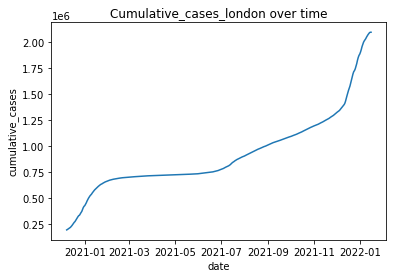

In [47]:
# 1. data frame with cumulative cases in London and date 

Cumulative_cases_london = covid_data.loc[covid_data["area"] == "London", ["date", "cumulative_cases" ]] 

# 2. Plot to visualize cumulative cases in London over time 
plt.plot(Cumulative_cases_london['date'],Cumulative_cases_london['cumulative_cases'])
plt.title("Cumulative_cases_london over time")
plt.ylabel("cumulative_cases")
plt.xlabel("date")
plt.show()

# 3.Is there a period in time in which the cases plateaued?
# we can see that the number of cases plateaued between the time 2021-02 and 2021-07 


In [41]:
Cumulative_cases_london

date  cumulative_cases
5574 2022-01-16         2092884.0
5575 2022-01-15         2092884.0
5576 2022-01-14         2089322.0
5577 2022-01-13         2080640.0
5578 2022-01-12         2070393.0
...         ...               ...
5974 2020-12-12          209959.0
5975 2020-12-11          205299.0
5976 2020-12-10          199829.0
5977 2020-12-09          194832.0
5978 2020-12-08          190429.0

[405 rows x 2 columns]

In [49]:
covid_data1 = covid_data.copy()

Task 16:

In [55]:
# 1. data frame with cumulative cases from all the country and date 

cumulative_cases_all_country = covid_data.groupby(['date'])['cumulative_cases'].agg('sum').reset_index()
cumulative_cases_all_country

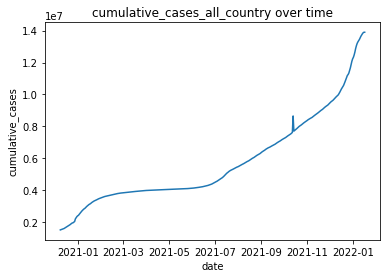

In [57]:
# 2. Plot to visualize evolution through time of cumulative cases summed over all areas
plt.plot(cumulative_cases_all_country['date'],cumulative_cases_all_country['cumulative_cases'])
plt.title("cumulative_cases_all_country over time")
plt.ylabel("cumulative_cases")
plt.xlabel("date")
plt.show()

# 3.does the pattern seen in London hold country-wide
# we can see that the cumulative cases pattern seen in London hold country-wide , we can say that from the very similar plots.


Task 17:

In [58]:
# 1. data frame with cumulative cases of different areas and date 

cumulative_cases_country_byarea = covid_data.groupby(['area','date'])['cumulative_cases'].agg('sum').reset_index()
cumulative_cases_country_byarea

area       date  cumulative_cases
0                East Midlands 2020-12-08          149394.0
1                East Midlands 2020-12-09          150788.0
2                East Midlands 2020-12-10          152220.0
3                East Midlands 2020-12-11          153651.0
4                East Midlands 2020-12-12          154685.0
...                        ...        ...               ...
4025  Yorkshire and The Humber 2022-01-12         1284018.0
4026  Yorkshire and The Humber 2022-01-13         1292436.0
4027  Yorkshire and The Humber 2022-01-14         1299220.0
4028  Yorkshire and The Humber 2022-01-15         1302452.0
4029  Yorkshire and The Humber 2022-01-16         1302452.0

[4030 rows x 3 columns]

<Figure size 864x864 with 0 Axes>

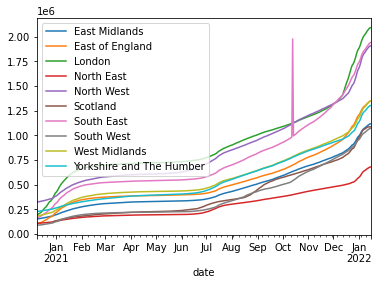

In [93]:
#2. plot of evolution of cumulative cases of different areas as different lines
plt.figure(figsize=(12,12))
fig, ax = plt.subplots()
for label, grp in cumulative_cases_country_byarea.groupby('area'):
    grp.plot(x = 'date', y = 'cumulative_cases',ax = ax, label = label )
    
#3.What patterns do all nations/regions share?
# we can see that the pattern is similar in all the areas with some of the regions with lower cummulative cases.
# we can see that cases plateaued from february-2021 to july-2021 from which point the cases raised in all the regions
# the cases took a sudden surge in south east during oct 
# we can also observe the maximum cummulative cases are in London and lowest are in North East region

Task 18:

In [ ]:
#what event could have taken place in June-July that could justify the trend seen from there onward?

# The Govt of UK eased  the restrictions on large events and performances from 21 June 2021.
# The lockdown was removed from 19th July 2021 this might have been the cause of increase in the covid cases from july 


Task 19:

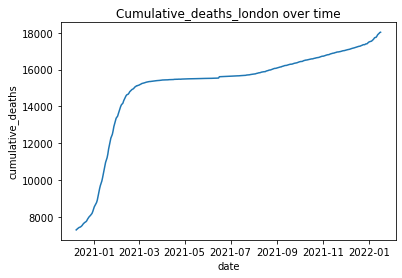

In [67]:
# 1. data frame with cumulative deaths in London and date

Cumulative_deaths_london = covid_data.loc[covid_data["area"] == "London", ["date", "cumulative_deaths" ]] 

# 2. Plot to visualize cumulative deaths in London over time 
plt.plot(Cumulative_deaths_london['date'],Cumulative_deaths_london['cumulative_deaths'])
plt.title("Cumulative_deaths_london over time")
plt.ylabel("cumulative_deaths")
plt.xlabel("date")
plt.show()

# 3.Is there a noticeable period in time when the ongoing trend is broken? When?
# we can see that the number of cases plateaued between the time 2021-02 and 2021-07 
# The increase in cummulative deaths was low after 2021-09(after the removal of lockdown) , this might be due to vaccination

Task 20:

In [ ]:
#Based on the data and plot from the last question,is there any similarity between trends in cumulative cases
#and cumulative deaths?

#from the plots of cumulative cases and cumulative deaths in london we can say that both the deaths and cases were plateaued from
# 2021-01 and 2021-07

# the cases and deaths increased after the lockdown was removed in july but the increase in cases were not proportional to the 
#increase of Death

# the rate of increase of cumulative deaths droped compared to the cases 

#This shows that the number of deaths per cases has decreased


In [74]:
covid_data.reset_index().drop(columns = 'index')

date                      area  cumulative_cases  \
0    2022-01-16             East Midlands         1117019.0   
1    2022-01-15             East Midlands         1117019.0   
2    2022-01-14             East Midlands         1114376.0   
3    2022-01-13             East Midlands         1108992.0   
4    2022-01-12             East Midlands         1102960.0   
...         ...                       ...               ...   
4026 2020-12-12  Yorkshire and The Humber          230021.0   
4027 2020-12-11  Yorkshire and The Humber          229073.0   
4028 2020-12-10  Yorkshire and The Humber          227842.0   
4029 2020-12-09  Yorkshire and The Humber          226627.0   
4030 2020-12-08  Yorkshire and The Humber          225284.0   

      cumulative_deaths  cumulative_vaccinated  \
0               12074.0              3477285.0   
1               12070.0              3477285.0   
2               12048.0              3474444.0   
3               12028.0              3472812.0   
4               12004.0              3471035.0   
...                 ...                    ...   
4026             6741.0                  967.0   
4027             6691.0                  966.0   
4028             6633.0                  963.0   
4029             6588.0                  959.0   
4030             6515.0                  957.0   

                                        vaccination_age  daily_cases_roll_avg  \
0                                                    []                   NaN   
1     [{'age': '12_15', 'VaccineRegisterPopulationBy...           2643.000000   
2     [{'age': '12_15', 'VaccineRegisterPopulationBy...           4013.500000   
3     [{'age': '12_15', 'VaccineRegisterPopulationBy...           4686.333333   
4     [{'age': '12_15', 'VaccineRegisterPopulationBy...           5115.250000   
...                                                 ...                   ...   
4026  [{'age': '12_15', 'VaccineRegisterPopulationBy...           1291.857143   
4027  [{'age': '12_15', 'VaccineRegisterPopulationBy...           1260.428571   
4028  [{'age': '12_15', 'VaccineRegisterPopulationBy...           1266.142857   
4029  [{'age': '12_15', 'VaccineRegisterPopulationBy...           1282.857143   
4030  [{'age': '12_15', 'VaccineRegisterPopulationBy...           1261.428571   

      daily_deaths_roll_avg  
0                  4.000000  
1                 13.000000  
2                 15.333333  
3                 17.500000  
4                 21.600000  
...                     ...  
4026              46.571429  
4027              47.714286  
4028              47.428571  
4029              48.285714  
4030              49.571429  

[4031 rows x 8 columns]

Task 21:

In [77]:
# new column, cumulative deaths per cases, showing the ratio between cumulative deaths and cumulative cases in each row
covid_data["cumulative_deaths_per_cases"] =  covid_data["cumulative_deaths"] / covid_data["cumulative_cases"]

# dataframe with date and cumulative deaths per cases
cumulative_deaths_per_cases_date = covid_data.groupby(['date'])['cumulative_deaths_per_cases'].agg('sum').reset_index()

In [78]:
cumulative_deaths_per_cases_date

date  cumulative_deaths_per_cases
0   2020-12-08                     0.326496
1   2020-12-09                     0.324994
2   2020-12-10                     0.323151
3   2020-12-11                     0.320708
4   2020-12-12                     0.319745
..         ...                          ...
400 2022-01-12                     0.102588
401 2022-01-13                     0.102247
402 2022-01-14                     0.101966
403 2022-01-15                     0.101934
404 2022-01-16                     0.101987

[405 rows x 2 columns]

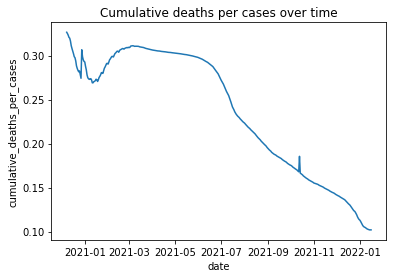

In [79]:
# 2. Plot to visualize cumulative deaths per cases over time 
plt.plot(cumulative_deaths_per_cases_date['date'],cumulative_deaths_per_cases_date['cumulative_deaths_per_cases'])
plt.title("Cumulative deaths per cases over time")
plt.ylabel("cumulative_deaths_per_cases")
plt.xlabel("date")
plt.show()

In [ ]:
# 3. What overall trends can be seen?

# we can see that the cumulative deaths per cases decreases from 2021-07 

# we can see that deaths per cases decresed for a while in 2021-01 and then increased followed by another decrease 
#followed by a gradual increase till 2021-03 

# cumulative deaths per cases remained constant with a little decrese during the period of 2021-03 and 2021-07

Task 22:

In [80]:
#June-July,the graph’s inclination gets steeper. What could be a reasonable explanation?

#During June-July the Lockdown was gradually removed in UK which increased the number of cases.
#At the same time vaccinations were given to most of the people in UK this decreased the number of deaths.
# Due to this the number of deaths per cases decreased drastically , this can be seen from the steeper inclination of the graph.


Task 23:

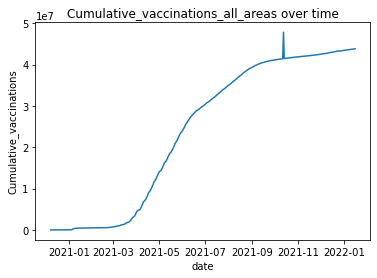

In [81]:
# 1. data frame with sum of cumulative vaccinations over all areas and date

Cumulative_vaccinations_all_areas = covid_data.groupby(['date'])['cumulative_vaccinated'].agg('sum').reset_index() 

# 2. Plot to visualize sum of cumulative vaccinations over all areas over time 
plt.plot(Cumulative_vaccinations_all_areas['date'],Cumulative_vaccinations_all_areas['cumulative_vaccinated'])
plt.title("Cumulative_vaccinations_all_areas over time")
plt.ylabel("Cumulative_vaccinations")
plt.xlabel("date")
plt.show()

# 3.Are there any relationships between the trends seen here and the ones seen in Task 21?

#we can see that in cummulative vaccination graph the cummulative vaccinations increased from the date from 2021-04
#we can see that cummulative number of deaths decreased over time from 2021-04 
#This might imply that the vaccination of large number of people played a role in decrease of number of cummulative deaths



Task 24:

In [84]:
#daily cases rolling average as a function of time, separated by areas

#1. dataframe with daily cases rolling average and date , separated by areas

daily_cases_rolling_avg_byarea = covid_data.groupby(['area','date'])['daily_cases_roll_avg'].agg('sum').reset_index()
daily_cases_rolling_avg_byarea

area       date  daily_cases_roll_avg
0                East Midlands 2020-12-08           1397.285714
1                East Midlands 2020-12-09           1442.857143
2                East Midlands 2020-12-10           1484.714286
3                East Midlands 2020-12-11           1521.000000
4                East Midlands 2020-12-12           1559.571429
...                        ...        ...                   ...
4025  Yorkshire and The Humber 2022-01-12           6851.000000
4026  Yorkshire and The Humber 2022-01-13           6144.666667
4027  Yorkshire and The Humber 2022-01-14           5008.000000
4028  Yorkshire and The Humber 2022-01-15           3232.000000
4029  Yorkshire and The Humber 2022-01-16              0.000000

[4030 rows x 3 columns]

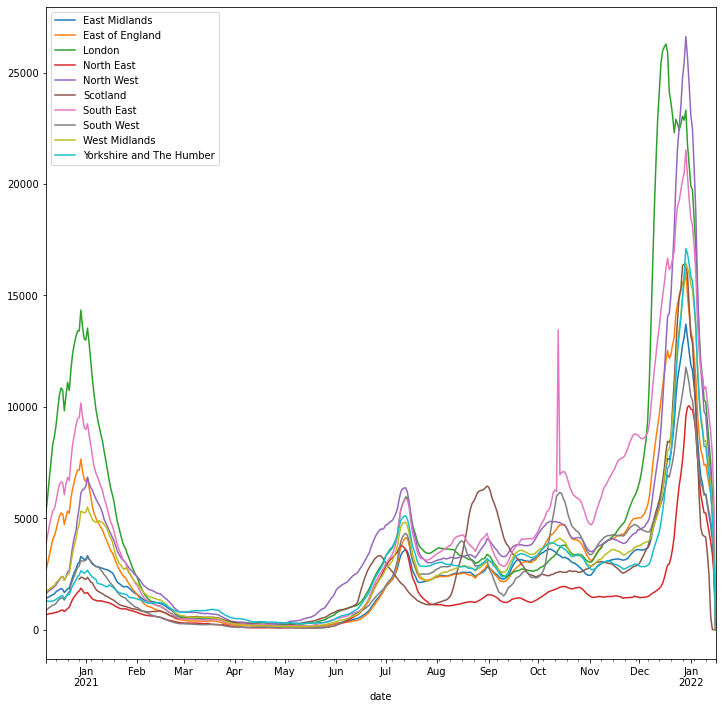

In [90]:
#2. plot of evolution daily cases rolling average of different areas as a function of time
fig, ax = plt.subplots()
for label, grp in daily_cases_rolling_avg_byarea.groupby('area'):
    grp.plot(x = 'date', y = 'daily_cases_roll_avg',ax = ax, label = label , figsize=(12,12))

#3. Is there a specific area that seems to escape the general trend in any way? Which one and how?
# we can see that Scotland data is not following the same pattern as the others we an see that one rise in the rolling cases
#occured in the end of june when the rise occured in mid july 2021 for other groups 

#We can also see that 2nd rise occured in september while the other regions had a rise in oct end

Task 25:

In [106]:
#1. Dataframe daily cases rolling average as a function of time for the area(Scotland) alongside another area that follows the general trend

daily_cases_rolling_avg_byarea_subset = daily_cases_rolling_avg_byarea.loc[daily_cases_rolling_avg_byarea["area"].isin(
                                            ["London","Scotland"]),["date", "area","daily_cases_roll_avg"]]

daily_cases_rolling_avg_byarea_subset

date      area  daily_cases_roll_avg
810  2020-12-08    London           5290.428571
811  2020-12-09    London           6019.428571
812  2020-12-10    London           6815.714286
813  2020-12-11    London           7549.285714
814  2020-12-12    London           8309.142857
...         ...       ...                   ...
2405 2022-01-12  Scotland           2436.500000
2406 2022-01-13  Scotland            574.000000
2407 2022-01-14  Scotland              0.000000
2408 2022-01-15  Scotland              0.000000
2409 2022-01-16  Scotland              0.000000

[790 rows x 3 columns]

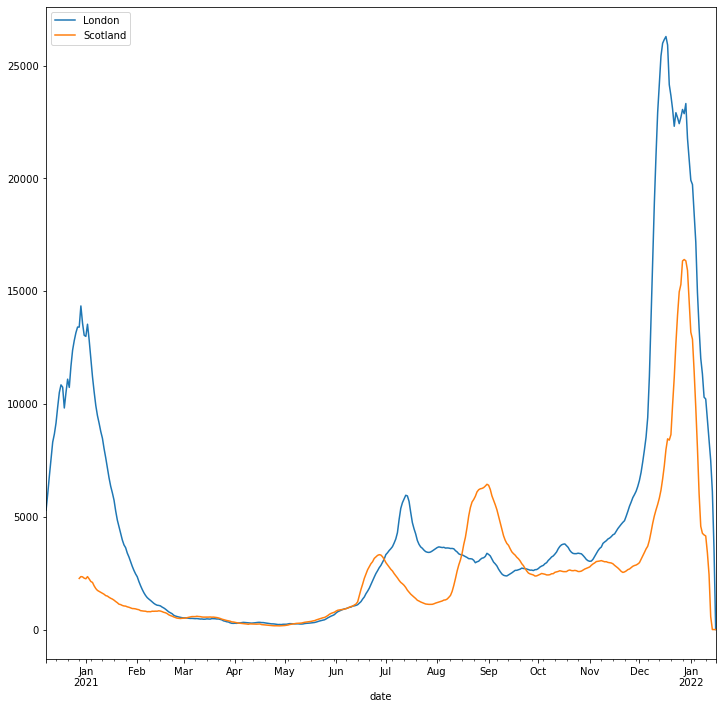

In [107]:
#2. Plot of Rolling avg of Scotland and London over time 
fig, ax = plt.subplots()
for label, grp in daily_cases_rolling_avg_byarea_subset.groupby('area') :
    grp.plot(x = 'date', y = 'daily_cases_roll_avg',ax = ax, label = label , figsize=(12,12))
    
#3. What reasons there might be to justify this difference?
# Reason might be because the spread started in scotland first and spread to other parts this explains the increase in the cases
#first in Scotland during end of june and september

Task 26:

In [108]:
covid_data1["daily_cases_roll_avg"].max()

26624.571428571428

In [111]:
#Normalised values of covid deaths 

covid_data["daily_cases_roll_avg_norm"] =  covid_data["daily_cases_roll_avg"] / covid_data["daily_cases_roll_avg"].max()

covid_data["daily_deaths_roll_avg_norm"] =  covid_data["daily_deaths_roll_avg"] / covid_data["daily_deaths_roll_avg"].max()


In [112]:
covid_data

date                      area  cumulative_cases  \
4187 2022-01-16             East Midlands         1117019.0   
4188 2022-01-15             East Midlands         1117019.0   
4189 2022-01-14             East Midlands         1114376.0   
4190 2022-01-13             East Midlands         1108992.0   
4191 2022-01-12             East Midlands         1102960.0   
...         ...                       ...               ...   
3869 2020-12-12  Yorkshire and The Humber          230021.0   
3870 2020-12-11  Yorkshire and The Humber          229073.0   
3871 2020-12-10  Yorkshire and The Humber          227842.0   
3872 2020-12-09  Yorkshire and The Humber          226627.0   
3873 2020-12-08  Yorkshire and The Humber          225284.0   

      cumulative_deaths  cumulative_vaccinated  \
4187            12074.0              3477285.0   
4188            12070.0              3477285.0   
4189            12048.0              3474444.0   
4190            12028.0              3472812.0   
4191            12004.0              3471035.0   
...                 ...                    ...   
3869             6741.0                  967.0   
3870             6691.0                  966.0   
3871             6633.0                  963.0   
3872             6588.0                  959.0   
3873             6515.0                  957.0   

                                        vaccination_age  daily_cases_roll_avg  \
4187                                                 []                   NaN   
4188  [{'age': '12_15', 'VaccineRegisterPopulationBy...           2643.000000   
4189  [{'age': '12_15', 'VaccineRegisterPopulationBy...           4013.500000   
4190  [{'age': '12_15', 'VaccineRegisterPopulationBy...           4686.333333   
4191  [{'age': '12_15', 'VaccineRegisterPopulationBy...           5115.250000   
...                                                 ...                   ...   
3869  [{'age': '12_15', 'VaccineRegisterPopulationBy...           1291.857143   
3870  [{'age': '12_15', 'VaccineRegisterPopulationBy...           1260.428571   
3871  [{'age': '12_15', 'VaccineRegisterPopulationBy...           1266.142857   
3872  [{'age': '12_15', 'VaccineRegisterPopulationBy...           1282.857143   
3873  [{'age': '12_15', 'VaccineRegisterPopulationBy...           1261.428571   

      daily_deaths_roll_avg  cumulative_deaths_per_cases  \
4187               4.000000                     0.010809   
4188              13.000000                     0.010806   
4189              15.333333                     0.010811   
4190              17.500000                     0.010846   
4191              21.600000                     0.010883   
...                     ...                          ...   
3869              46.571429                     0.029306   
3870              47.714286                     0.029209   
3871              47.428571                     0.029112   
3872              48.285714                     0.029070   
3873              49.571429                     0.028919   

      daily_cases_roll_avg_norm  daily_deaths_roll_avg_norm  
4187                        NaN                    0.016374  
4188                   0.099269                    0.053216  
4189                   0.150744                    0.062768  
4190                   0.176015                    0.071637  
4191                   0.192125                    0.088421  
...                         ...                         ...  
3869                   0.048521                    0.190643  
3870                   0.047341                    0.195322  
3871                   0.047555                    0.194152  
3872                   0.048183                    0.197661  
3873                   0.047378                    0.202924  

[4031 rows x 11 columns]

In [113]:
# data frame the normalised rolling average of deaths and the normalised rolling average of cases summed over all areas
daily_cases_roll_avg_norm_date = covid_data.groupby(['date'])['daily_cases_roll_avg_norm'].agg('sum').reset_index()
daily_deaths_roll_avg_norm_date = covid_data.groupby(['date'])['daily_deaths_roll_avg_norm'].agg('sum').reset_index()

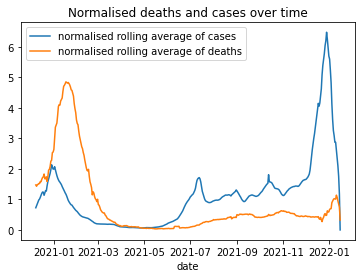

In [121]:
#Plots for date as the x-axis, plot two lines: the normalised rolling average of deaths and the normalised rolling average of cases summed over all areas
fig, ax = plt.subplots()
plt.plot(daily_cases_roll_avg_norm_date['date'],daily_cases_roll_avg_norm_date['daily_cases_roll_avg_norm'] , label = "normalised rolling average of cases")
plt.plot(daily_deaths_roll_avg_norm_date['date'],daily_deaths_roll_avg_norm_date['daily_deaths_roll_avg_norm'] , label = "normalised rolling average of deaths")

plt.xlabel("date")
plt.title("Normalised deaths and cases over time")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

#3. Are daily trends of cases and deaths increasing and decreasing at the same rates? What part of the plot tells you this?

# the rolling average of cases can be seen decreasing in 2021-01 , 
#rolling average of deaths increased till 2021-02 from which point it had a downward trend.

# we can see that number of cases increased  after 2021-07 but the increase in number of deaths is very low and is almost constant.

**Task 27 :**

In [131]:
# Vaccination details dataframes London,Scotland 

covid_data_vaccinations_wide_London = covid_data_vaccinations_wide.loc[covid_data_vaccinations_wide["area"]== "London"]
covid_data_vaccinations_wide_Scotland = covid_data_vaccinations_wide.loc[covid_data_vaccinations_wide["area"]== "Scotland"]

In [184]:
covid_data_vaccinations_wide_London1 = covid_data_vaccinations_wide_London[['date', 'age' ,'cumVaccinationFirstDoseUptakeByVaccinationDatePercentage']]
covid_data_vaccinations_wide_London1

In [186]:
covid_data_vaccinations_wide_London2 = covid_data_vaccinations_wide_London1.pivot_table('cumVaccinationFirstDoseUptakeByVaccinationDatePercentage',
                                                                                        ["date"] ,'age')
covid_data_vaccinations_wide_London2.reset_index()

age       date  12_15  16_17  18_24  25_29  30_34  35_39  40_44  45_49  50_54  \
0   2020-12-08    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1   2020-12-09    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2   2020-12-10    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.1   
3   2020-12-11    0.0    0.0    0.0    0.1    0.1    0.0    0.1    0.1    0.1   
4   2020-12-12    0.0    0.0    0.0    0.1    0.1    0.0    0.1    0.1    0.1   
..         ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
399 2022-01-11   39.7   51.4   60.8   63.6   61.8   63.4   68.0   73.4   78.0   
400 2022-01-12   39.8   51.4   60.9   63.6   61.8   63.4   68.0   73.5   78.0   
401 2022-01-13   39.9   51.5   61.0   63.7   61.9   63.4   68.0   73.5   78.0   
402 2022-01-14   40.0   51.6   61.1   63.7   61.9   63.4   68.1   73.5   78.0   
403 2022-01-15   40.2   51.7   61.2   63.8   62.0   63.5   68.1   73.5   78.0   

age  55_59  60_64  65_69  70_74  75_79  80_84  85_89   90+  
0      0.0    0.0    0.0    0.0    0.0    0.1    0.1   0.1  
1      0.0    0.0    0.0    0.0    0.0    0.2    0.2   0.1  
2      0.1    0.1    0.1    0.0    0.0    0.3    0.4   0.3  
3      0.1    0.1    0.1    0.1    0.1    0.5    0.5   0.4  
4      0.1    0.1    0.1    0.1    0.1    0.7    0.7   0.5  
..     ...    ...    ...    ...    ...    ...    ...   ...  
399   80.8   83.4   85.6   88.5   89.7   89.7   89.9  88.5  
400   80.8   83.4   85.6   88.5   89.7   89.7   89.9  88.5  
401   80.8   83.4   85.6   88.5   89.7   89.7   89.9  88.5  
402   80.8   83.4   85.6   88.5   89.7   89.7   89.9  88.5  
403   80.8   83.4   85.6   88.5   89.7   89.7   89.9  88.5  

[404 rows x 18 columns]

<AxesSubplot:xlabel='date'>

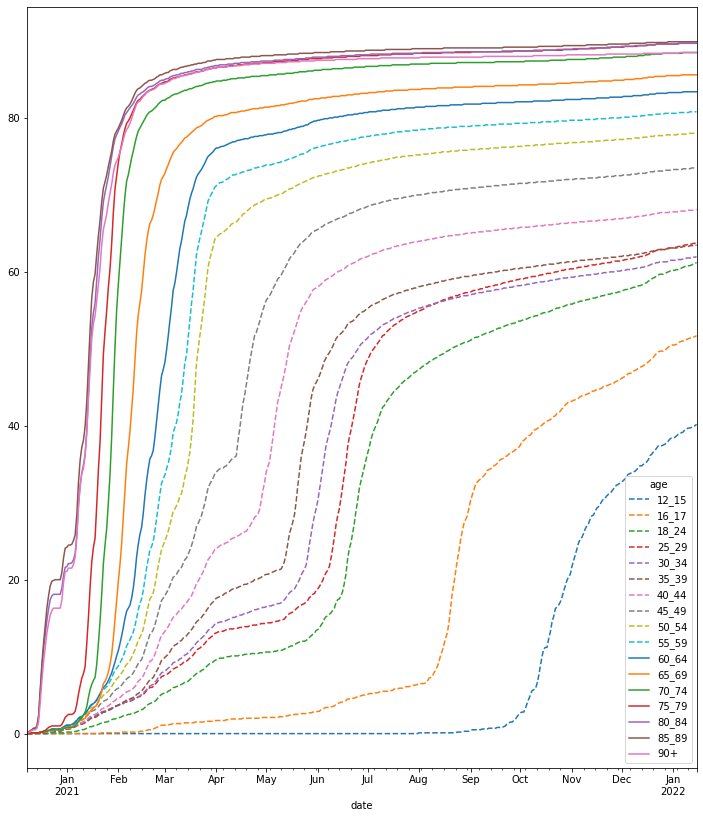

In [198]:
covid_data_vaccinations_wide_London2.plot(style=['--' for _ in range(10)], figsize=(12,14) )

#Question: Were all age groups vaccinated equally and at the same time, or was there a
#strategy employed? What strategy does the plot indicate and why?

#All age were not equally vaccinated , as we can see from the plot the vaccination began for 80+ age groups early on and 
# age group 12 - 15 started vaccinations after october 
# Stategy was to give preference to vaccination the older populations who were more suceptable to Covid- 19 

**Task 28 :**

In [169]:
covid_data_vaccinations_wide_Scotland1 = covid_data_vaccinations_wide_Scotland[['date', 'age' ,'cumVaccinationFirstDoseUptakeByVaccinationDatePercentage']]

covid_data_vaccinations_wide_Scotland1

date    age  \
1404 2022-01-13  12_15   
1404 2022-01-13  16_17   
1404 2022-01-13  18_29   
1404 2022-01-13  30_39   
1404 2022-01-13  40_49   
...         ...    ...   
1785 2020-12-28  60_64   
1785 2020-12-28  65_69   
1785 2020-12-28  70_74   
1785 2020-12-28  75_79   
1785 2020-12-28    80+   

      cumVaccinationFirstDoseUptakeByVaccinationDatePercentage  
1404                                               66.6         
1404                                               81.5         
1404                                               80.3         
1404                                               85.8         
1404                                               92.6         
...                                                 ...         
1785                                                2.5         
1785                                                1.1         
1785                                                0.5         
1785                                                0.8         
1785                                                3.5         

[4584 rows x 3 columns]

In [200]:
covid_data_vaccinations_wide_Scotland2 = covid_data_vaccinations_wide_Scotland1.pivot_table('cumVaccinationFirstDoseUptakeByVaccinationDatePercentage',
                                                                                        ["date"] ,'age')
covid_data_vaccinations_wide_Scotland2.reset_index()

age       date  12_15  16_17  18_29  30_39  40_49  50_54  55_59  60_64  65_69  \
0   2020-12-28    0.0    0.0    1.5    2.2    2.8    3.2    3.3    2.5    1.1   
1   2020-12-29    0.0    0.0    1.6    2.4    3.0    3.5    3.5    2.7    1.2   
2   2020-12-30    0.0    0.0    1.7    2.5    3.2    3.7    3.8    2.9    1.3   
3   2020-12-31    0.0    0.1    1.7    2.6    3.3    3.8    3.9    3.0    1.3   
4   2021-01-01    0.0    0.1    1.7    2.6    3.3    3.8    3.9    3.0    1.3   
..         ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
377 2022-01-09   66.1   81.2   80.2   85.7   92.6   97.0   99.5  100.0  100.0   
378 2022-01-10   66.2   81.2   80.2   85.7   92.6   97.0   99.5  100.0  100.0   
379 2022-01-11   66.3   81.3   80.3   85.7   92.6   97.0   99.5  100.0  100.0   
380 2022-01-12   66.4   81.4   80.3   85.7   92.6   97.0   99.5  100.0  100.0   
381 2022-01-13   66.6   81.5   80.3   85.8   92.6   97.0   99.5  100.0  100.0   

age  70_74  75_79    80+  
0      0.5    0.8    3.5  
1      0.6    0.9    3.9  
2      0.6    1.0    4.3  
3      0.7    1.1    4.6  
4      0.7    1.1    4.6  
..     ...    ...    ...  
377  100.0  100.0  100.0  
378  100.0  100.0  100.0  
379  100.0  100.0  100.0  
380  100.0  100.0  100.0  
381  100.0  100.0  100.0  

[382 rows x 13 columns]

<AxesSubplot:xlabel='date'>

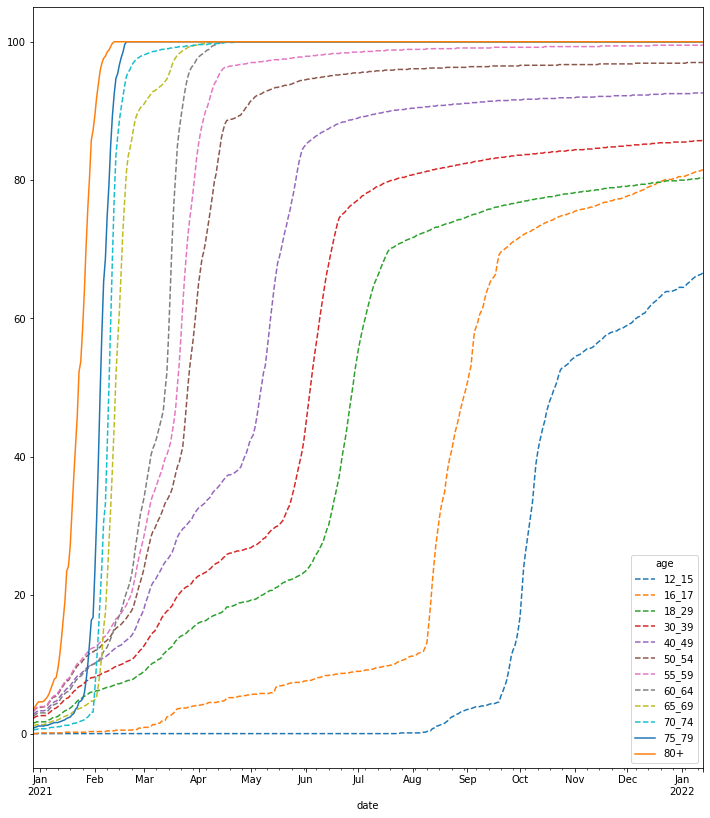

In [201]:
covid_data_vaccinations_wide_Scotland2.plot(style=['--' for _ in range(10)], figsize=(12,14) )

#Question: In both plots, compare how vaccination evolved for two sections of population:50-64 years and 65-79 years. Were there any differences in the strategies employed
#between London and Scotland for dealing with both sections?


#We can see from the plot age vaccinations for 65-79 were more steeper impying that priority was given to complete the vaccinations
#for this age group 50-64 age group was vaccinted at slower pace
#we can see that London and Scotland followed almost the same pattern of vaccination